<a href="https://colab.research.google.com/github/santoshF/python/blob/master/FinanceDS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Finance DS

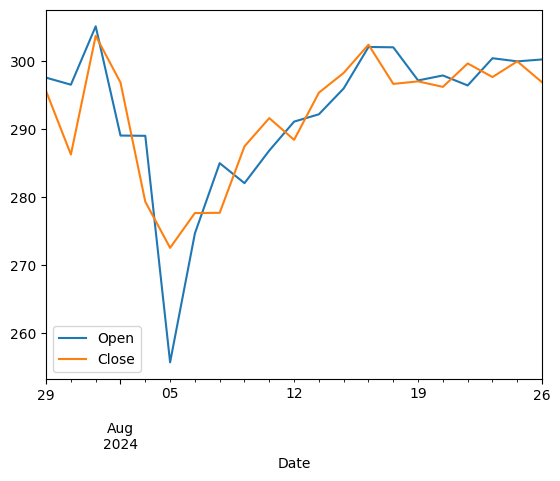

In [2]:
# prompt: write a code to get the latest stock exchange data for symbol ETN in a dataframe show a visualization of open and closed values limit data for current year

!pip install yfinance
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt

# Get the data for the stock ETN
etn = yf.Ticker("ETN")

# Get the historical prices for this year
etn_hist = etn.history(period="1mo")

# Extract the open and close prices
etn_open_close = etn_hist[["Open", "Close"]]

# Plot the open and close prices
etn_open_close.plot()
plt.show()


In [3]:
# show financials:
etn.calendar

{'Dividend Date': datetime.date(2024, 8, 23),
 'Ex-Dividend Date': datetime.date(2024, 8, 5),
 'Earnings Date': [datetime.date(2024, 10, 29), datetime.date(2024, 11, 4)],
 'Earnings High': 2.85,
 'Earnings Low': 2.73,
 'Earnings Average': 2.79,
 'Revenue High': 6424700000,
 'Revenue Low': 6295650000,
 'Revenue Average': 6373040000}

In [4]:
etn.income_stmt

,2023-12-31,2022-12-31,2021-12-31,2020-12-31,2019-12-31
Tax Effect Of Unusual Items,0.0,3672000.0,159803000.0,41990000.0,NaN
Tax Rate For Calcs,0.158,0.153,0.259,0.19,NaN
Normalized EBITDA,4904000000.0,3985000000.0,3345000000.0,2485000000.0,NaN
Total Unusual Items,0.0,24000000.0,617000000.0,221000000.0,NaN
Total Unusual Items Excluding Goodwill,0.0,24000000.0,617000000.0,221000000.0,NaN
Net Income From Continuing Operation Net Minority Interest,3218000000.0,2462000000.0,2144000000.0,1410000000.0,NaN
Reconciled Depreciation,926000000.0,954000000.0,922000000.0,811000000.0,NaN
Reconciled Cost Of Revenue,14762000000.0,13865000000.0,13293000000.0,12408000000.0,NaN
EBITDA,4904000000.0,4009000000.0,3962000000.0,2706000000.0,NaN
EBIT,3978000000.0,3055000000.0,3040000000.0,1895000000.0,NaN


In [5]:
# show meta information about the history (requires history() to be called first)
etn.history_metadata

{'currency': 'USD',
 'symbol': 'ETN',
 'exchangeName': 'NYQ',
 'fullExchangeName': 'NYSE',
 'instrumentType': 'EQUITY',
 'firstTradeDate': 76253400,
 'regularMarketTime': 1724702402,
 'hasPrePostMarketData': True,
 'gmtoffset': -14400,
 'timezone': 'EDT',
 'exchangeTimezoneName': 'America/New_York',
 'regularMarketPrice': 296.91,
 'fiftyTwoWeekHigh': 301.75,
 'fiftyTwoWeekLow': 296.0,
 'regularMarketDayHigh': 301.75,
 'regularMarketDayLow': 296.0,
 'regularMarketVolume': 1531839,
 'longName': 'Eaton Corporation plc',
 'shortName': 'Eaton Corporation, PLC',
 'chartPreviousClose': 297.79,
 'priceHint': 2,
 'currentTradingPeriod': {'pre': {'timezone': 'EDT',
   'start': 1724745600,
   'end': 1724765400,
   'gmtoffset': -14400},
  'regular': {'timezone': 'EDT',
   'start': 1724765400,
   'end': 1724788800,
   'gmtoffset': -14400},
  'post': {'timezone': 'EDT',
   'start': 1724788800,
   'end': 1724803200,
   'gmtoffset': -14400}},
 'dataGranularity': '1d',
 'range': '1mo',
 'validRanges': 

In [6]:
#etn.sec_filings
# - income statement
etn.income_stmt


,2024-06-30,2024-03-31,2023-12-31,2023-09-30,2023-06-30,2023-03-31,2022-12-31
Tax Effect Of Unusual Items,0.0,0.0,0.0,0.0,0.0,NaN,NaN
Tax Rate For Calcs,0.168,0.179,0.129596,0.173,0.17,NaN,NaN
Normalized EBITDA,1451000000.0,1256000000.0,1346000000.0,1341000000.0,1168000000.0,NaN,NaN
Total Unusual Items,NaN,NaN,0.0,0.0,0.0,0.0,0.0
Total Unusual Items Excluding Goodwill,NaN,NaN,0.0,0.0,0.0,0.0,0.0
Net Income From Continuing Operation Net Minority Interest,993000000.0,821000000.0,945000000.0,891000000.0,744000000.0,NaN,NaN
Reconciled Depreciation,227000000.0,225000000.0,231000000.0,229000000.0,228000000.0,NaN,NaN
Reconciled Cost Of Revenue,3940000000.0,3725000000.0,3732000000.0,3684000000.0,3747000000.0,NaN,NaN
EBITDA,1451000000.0,1256000000.0,1346000000.0,1341000000.0,1168000000.0,NaN,NaN
EBIT,1224000000.0,1031000000.0,1115000000.0,1112000000.0,940000000.0,NaN,NaN


In [9]:
etn.quarterly_income_stmt

,2024-06-30,2024-03-31,2023-12-31,2023-09-30,2023-06-30,2023-03-31,2022-12-31
Tax Effect Of Unusual Items,0.0,0.0,0.0,0.0,0.0,NaN,NaN
Tax Rate For Calcs,0.168,0.179,0.129596,0.173,0.17,NaN,NaN
Normalized EBITDA,1451000000.0,1256000000.0,1346000000.0,1341000000.0,1168000000.0,NaN,NaN
Total Unusual Items,NaN,NaN,0.0,0.0,0.0,0.0,0.0
Total Unusual Items Excluding Goodwill,NaN,NaN,0.0,0.0,0.0,0.0,0.0
Net Income From Continuing Operation Net Minority Interest,993000000.0,821000000.0,945000000.0,891000000.0,744000000.0,NaN,NaN
Reconciled Depreciation,227000000.0,225000000.0,231000000.0,229000000.0,228000000.0,NaN,NaN
Reconciled Cost Of Revenue,3940000000.0,3725000000.0,3732000000.0,3684000000.0,3747000000.0,NaN,NaN
EBITDA,1451000000.0,1256000000.0,1346000000.0,1341000000.0,1168000000.0,NaN,NaN
EBIT,1224000000.0,1031000000.0,1115000000.0,1112000000.0,940000000.0,NaN,NaN


In [10]:
# show actions (dividends, splits, capital gains)
etn.actions

,Dividends,Stock Splits
Date,,
2024-08-05 00:00:00-04:00,0.94,0.0


In [12]:
# - balance sheet
etn.balance_sheet
etn.quarterly_balance_sheet

,2024-06-30,2024-03-31,2023-12-31,2023-09-30,2023-06-30,2022-12-31
Ordinary Shares Number,399892083.0,399892083.0,399400000.0,399300000.0,399000000.0,NaN
Share Issued,399892083.0,399892083.0,399400000.0,399300000.0,399000000.0,NaN
Net Debt,9297000000.0,8714000000.0,8781000000.0,8801000000.0,8947000000.0,NaN
Total Debt,10493000000.0,9788000000.0,9802000000.0,9635000000.0,9782000000.0,NaN
Tangible Book Value,-513000000.0,-560000000.0,-1033000000.0,-1556000000.0,-2246000000.0,NaN
...,...,...,...,...,...,...
Gross Accounts Receivable,4905000000.0,4713000000.0,4513000000.0,4503000000.0,4438000000.0,NaN
Cash Cash Equivalents And Short Term Investments,2781000000.0,2442000000.0,2609000000.0,1906000000.0,1330000000.0,NaN
Other Short Term Investments,2241000000.0,1969000000.0,2121000000.0,1558000000.0,977000000.0,NaN
Cash And Cash Equivalents,540000000.0,473000000.0,488000000.0,348000000.0,353000000.0,NaN


In [ ]:


# show actions (dividends, splits, capital gains)
etn.actions
etn.dividends
etn.splits
etn.capital_gains  # only for mutual funds & etfs

# show share count
etn.get_shares_full(start="2024-01-01", end=None)




# - cash flow statement
etn.cashflow
etn.quarterly_cashflow
# see `Ticker.get_income_stmt()` for more options

# show holders
etn.major_holders
etn.institutional_holders
etn.mutualfund_holders
etn.insider_transactions
etn.insider_purchases
etn.insider_roster_holders

etn.sustainability

# show recommendations
etn.recommendations
etn.recommendations_summary
etn.upgrades_downgrades

# show analysts data
#etn.analyst_price_targets
#etn.earnings_estimate
#etn.revenue_estimate
#etn.earnings_history
#etn.eps_trend
#etn.eps_revisions
#etn.growth_estimates

# Show future and historic earnings dates, returns at most next 4 quarters and last 8 quarters by default.
# Note: If more are needed use etn.get_earnings_dates(limit=XX) with increased limit argument.
etn.earnings_dates

# show ISIN code - *experimental*
# ISIN = International Securities Identification Number
etn.isin

# show options expirations
etn.options

# show news
#etn.news

# get option chain for specific expiration
#opt = etn.option_chain('2024-08-26')
# data available via: opt.calls, opt.puts

('2024-09-20',
 '2024-10-18',
 '2025-01-17',
 '2025-04-17',
 '2025-06-20',
 '2026-01-16')

In [ ]:


# show actions (dividends, splits, capital gains)
etn.actions
etn.dividends
etn.splits
etn.capital_gains  # only for mutual funds & etfs

# show share count
etn.get_shares_full(start="2024-01-01", end=None)



# - balance sheet
etn.balance_sheet
etn.quarterly_balance_sheet
# - cash flow statement
etn.cashflow
etn.quarterly_cashflow
# see `Ticker.get_income_stmt()` for more options

# show holders
etn.major_holders
etn.institutional_holders
etn.mutualfund_holders
etn.insider_transactions
etn.insider_purchases
etn.insider_roster_holders

etn.sustainability

# show recommendations
etn.recommendations
etn.recommendations_summary
etn.upgrades_downgrades

# show analysts data
#etn.analyst_price_targets
#etn.earnings_estimate
#etn.revenue_estimate
#etn.earnings_history
#etn.eps_trend
#etn.eps_revisions
#etn.growth_estimates

# Show future and historic earnings dates, returns at most next 4 quarters and last 8 quarters by default.
# Note: If more are needed use etn.get_earnings_dates(limit=XX) with increased limit argument.
etn.earnings_dates

# show ISIN code - *experimental*
# ISIN = International Securities Identification Number
etn.isin

# show options expirations
etn.options

# show news
#etn.news

# get option chain for specific expiration
#opt = etn.option_chain('2024-08-26')
# data available via: opt.calls, opt.puts

('2024-09-20',
 '2024-10-18',
 '2025-01-17',
 '2025-04-17',
 '2025-06-20',
 '2026-01-16')

In [24]:
etn.sustainability

,esgScores
adult,False
alcoholic,False
animalTesting,False
catholic,False
coal,False
controversialWeapons,False
environmentPercentile,None
environmentScore,5.46
esgPerformance,UNDER_PERF
furLeather,False


In [7]:


# show actions (dividends, splits, capital gains)
etn.actions
etn.dividends
etn.splits
etn.capital_gains  # only for mutual funds & etfs

# show share count
etn.get_shares_full(start="2024-01-01", end=None)



# - balance sheet
etn.balance_sheet
etn.quarterly_balance_sheet
# - cash flow statement
etn.cashflow
etn.quarterly_cashflow
# see `Ticker.get_income_stmt()` for more options

# show holders
etn.major_holders
etn.institutional_holders
etn.mutualfund_holders
etn.insider_transactions
etn.insider_purchases
etn.insider_roster_holders

etn.sustainability

# show recommendations
etn.recommendations

etn.recommendations_summary
etn.upgrades_downgrades

# show analysts data
#etn.analyst_price_targets
#etn.earnings_estimate
#etn.revenue_estimate
#etn.earnings_history
#etn.eps_trend
#etn.eps_revisions
#etn.growth_estimates

# Show future and historic earnings dates, returns at most next 4 quarters and last 8 quarters by default.
# Note: If more are needed use etn.get_earnings_dates(limit=XX) with increased limit argument.
etn.earnings_dates

# show ISIN code - *experimental*
# ISIN = International Securities Identification Number
etn.isin

# show options expirations
etn.options

# show news
#etn.news

# get option chain for specific expiration
#opt = etn.option_chain('2024-08-26')
# data available via: opt.calls, opt.puts

('2024-09-20',
 '2024-10-18',
 '2025-01-17',
 '2025-04-17',
 '2025-06-20',
 '2026-01-16')

In [28]:
# prompt: filter date 2024-06-30 and 2024-03-31 from etn.quaterly_balance_sheet

# Check the available dates in the index
print(etn.quarterly_balance_sheet.index)

# If the dates are present in the index but have different format
# you can try converting them to datetime objects

# Convert the dates to datetime objects
dates = pd.to_datetime(['2024-06-30', '2024-03-31'])

# Filter the DataFrame using the converted dates
etn_quarterly_balance_sheet_filtered = etn.quarterly_balance_sheet[etn.quarterly_balance_sheet.index.isin(dates)]
print(etn_quarterly_balance_sheet_filtered)

# If the dates are not present you could try filtering for different dates
# For example, to get the latest two quarters you could use
etn_quarterly_balance_sheet_filtered = etn.quarterly_balance_sheet.iloc[:2]

Index(['Ordinary Shares Number', 'Share Issued', 'Net Debt', 'Total Debt',
       'Tangible Book Value', 'Invested Capital', 'Working Capital',
       'Net Tangible Assets', 'Capital Lease Obligations',
       'Common Stock Equity', 'Total Capitalization',
       'Total Equity Gross Minority Interest', 'Minority Interest',
       'Stockholders Equity', 'Other Equity Interest',
       'Gains Losses Not Affecting Retained Earnings',
       'Other Equity Adjustments', 'Retained Earnings',
       'Additional Paid In Capital', 'Capital Stock', 'Common Stock',
       'Total Liabilities Net Minority Interest',
       'Total Non Current Liabilities Net Minority Interest',
       'Other Non Current Liabilities', 'Employee Benefits',
       'Non Current Pension And Other Postretirement Benefit Plans',
       'Non Current Deferred Liabilities',
       'Non Current Deferred Taxes Liabilities',
       'Long Term Debt And Capital Lease Obligation',
       'Long Term Capital Lease Obligation', 'Long 

In [31]:
# - balance sheet
etn.quarterly_balance_sheet[1:]

,2024-06-30,2024-03-31,2023-12-31,2023-09-30,2023-06-30,2022-12-31
Share Issued,399892083.0,399892083.0,399400000.0,399300000.0,399000000.0,NaN
Net Debt,9297000000.0,8714000000.0,8781000000.0,8801000000.0,8947000000.0,NaN
Total Debt,10493000000.0,9788000000.0,9802000000.0,9635000000.0,9782000000.0,NaN
Tangible Book Value,-513000000.0,-560000000.0,-1033000000.0,-1556000000.0,-2246000000.0,NaN
Invested Capital,29056000000.0,28479000000.0,28305000000.0,27532000000.0,27253000000.0,NaN
...,...,...,...,...,...,...
Gross Accounts Receivable,4905000000.0,4713000000.0,4513000000.0,4503000000.0,4438000000.0,NaN
Cash Cash Equivalents And Short Term Investments,2781000000.0,2442000000.0,2609000000.0,1906000000.0,1330000000.0,NaN
Other Short Term Investments,2241000000.0,1969000000.0,2121000000.0,1558000000.0,977000000.0,NaN
Cash And Cash Equivalents,540000000.0,473000000.0,488000000.0,348000000.0,353000000.0,NaN


In [8]:
etn.info

{'address1': 'Eaton House',
 'address2': '30 Pembroke Road',
 'city': 'Dublin',
 'zip': 'D04 Y0C2',
 'country': 'Ireland',
 'phone': '353 1 637 2900',
 'website': 'https://www.eaton.com',
 'industry': 'Specialty Industrial Machinery',
 'industryKey': 'specialty-industrial-machinery',
 'industryDisp': 'Specialty Industrial Machinery',
 'sector': 'Industrials',
 'sectorKey': 'industrials',
 'sectorDisp': 'Industrials',
 'longBusinessSummary': "Eaton Corporation plc operates as a power management company worldwide. The company's Electrical Americas and Electrical Global segment provides electrical components, industrial components, power distribution and assemblies, residential products, single and three phase power quality and connectivity products, wiring devices, circuit protection products, utility power distribution products, power reliability equipment, and services, as well as hazardous duty electrical equipment, emergency lighting, fire detection, explosion-proof instrumentation, 

In [25]:
etn.recommendations

,period,strongBuy,buy,hold,sell,strongSell
0,0m,3,4,15,2,0
1,-1m,4,12,7,0,1
2,-2m,4,11,7,0,1
3,-3m,6,11,7,1,0
